In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [8]:
def thresh_bw_image(img_path:str):
    """ 
    parameter:
    image(String) = path to image file (png, jpeg)

    return:
    bw_image(cv2.image_array/numpy_image_array)
    """
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = image.copy()
    # img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(5, 5), 0)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, bw_image = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
    return bw_image,img_gray

def save_csv(center_dict:dict,csv_path:str):
    """_summary_

    Parameters
    ----------
    center_dict : dict
        _description_
    imags_path : str
        _description_
    """
    with open(csv_path, 'w', newline='') as f:
        # Create a CSV writer object
        writer = csv.writer(f)
        for row in center_dict.items():
            writer.writerow(row)    

In [4]:
# imags_path = "Data/Images from lab_test/images/undistorted/rigtht_calibrated_filtered_cropped"
# list_imgs_ = os.listdir(imags_path)
# list_imgs = sorted(list_imgs_)
# print(list_imgs[:10])

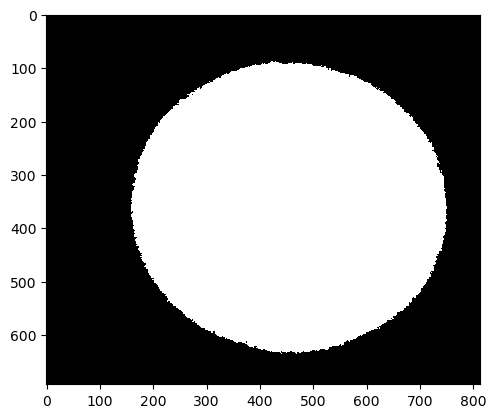

In [9]:
imags_path = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Repository for data and scripts\Glenn\Github\Master_thesis\Data\Images from lab_test\images\undistorted\rigtht_calibrated_filtered_cropped"
list_imgs_ = os.listdir(imags_path)
list_imgs = sorted(list_imgs_)
n = 77

image_test = cv2.imread(os.path.join(imags_path,list_imgs[n]),cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
edges = cv2.Canny(thresh,100,200)
plt.imshow(thresh,cmap="gray")
plt.show()

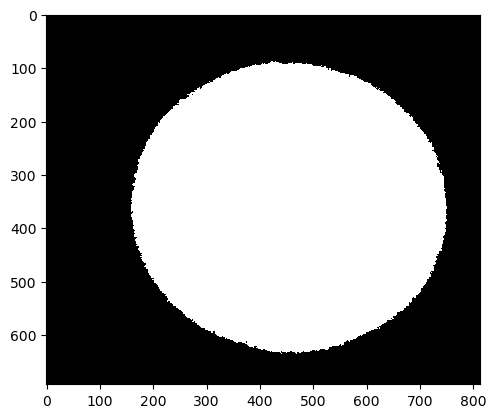

In [10]:
list_imgs_= os.listdir(imags_path)
list_imgs = sorted(list_imgs_)
n = 77

image_test = cv2.imread(os.path.join(imags_path,list_imgs[n]),cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
edges = cv2.Canny(thresh,100,200)
plt.imshow(thresh,cmap="gray")
plt.show()

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

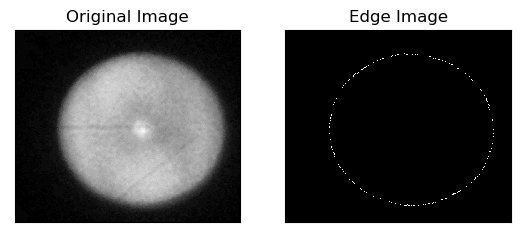

In [11]:
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Bounding Box center:  (455.5, 361.5)


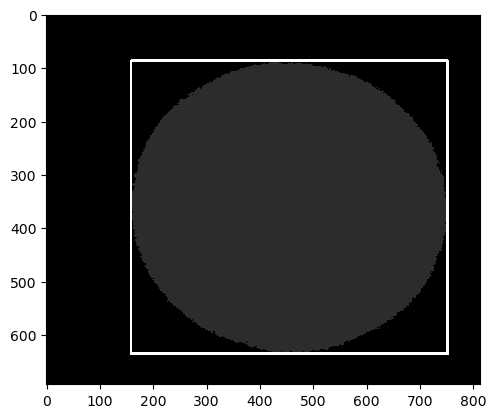

In [12]:
thresh = thresh.copy()
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
r = cv2.boundingRect(cnt)
print("Bounding Box center: ", (r[0]+0.5*r[2], r[1]+0.5*r[3]))

cv2.rectangle(thresh,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(255,255,255),3)
plt.imshow(thresh, cmap="gray")
plt.show()

Center of Circle:  (455, 358)


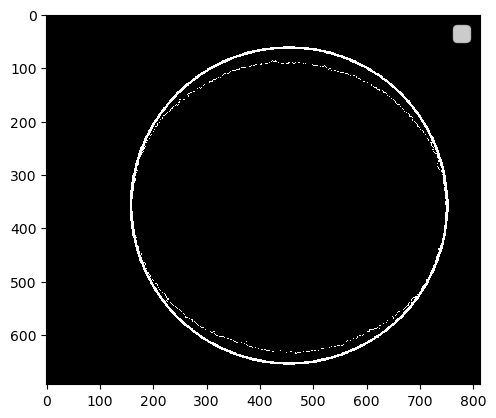

In [13]:
contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
print("Center of Circle: ",center)
radius = int(radius)
cv2.circle(edges,center,radius,(255,255,255),3)
plt.imshow(edges,cmap="gray")
plt.legend("Radius = {}pix".format(radius),fontsize=20,prop={'size': 15})
plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0

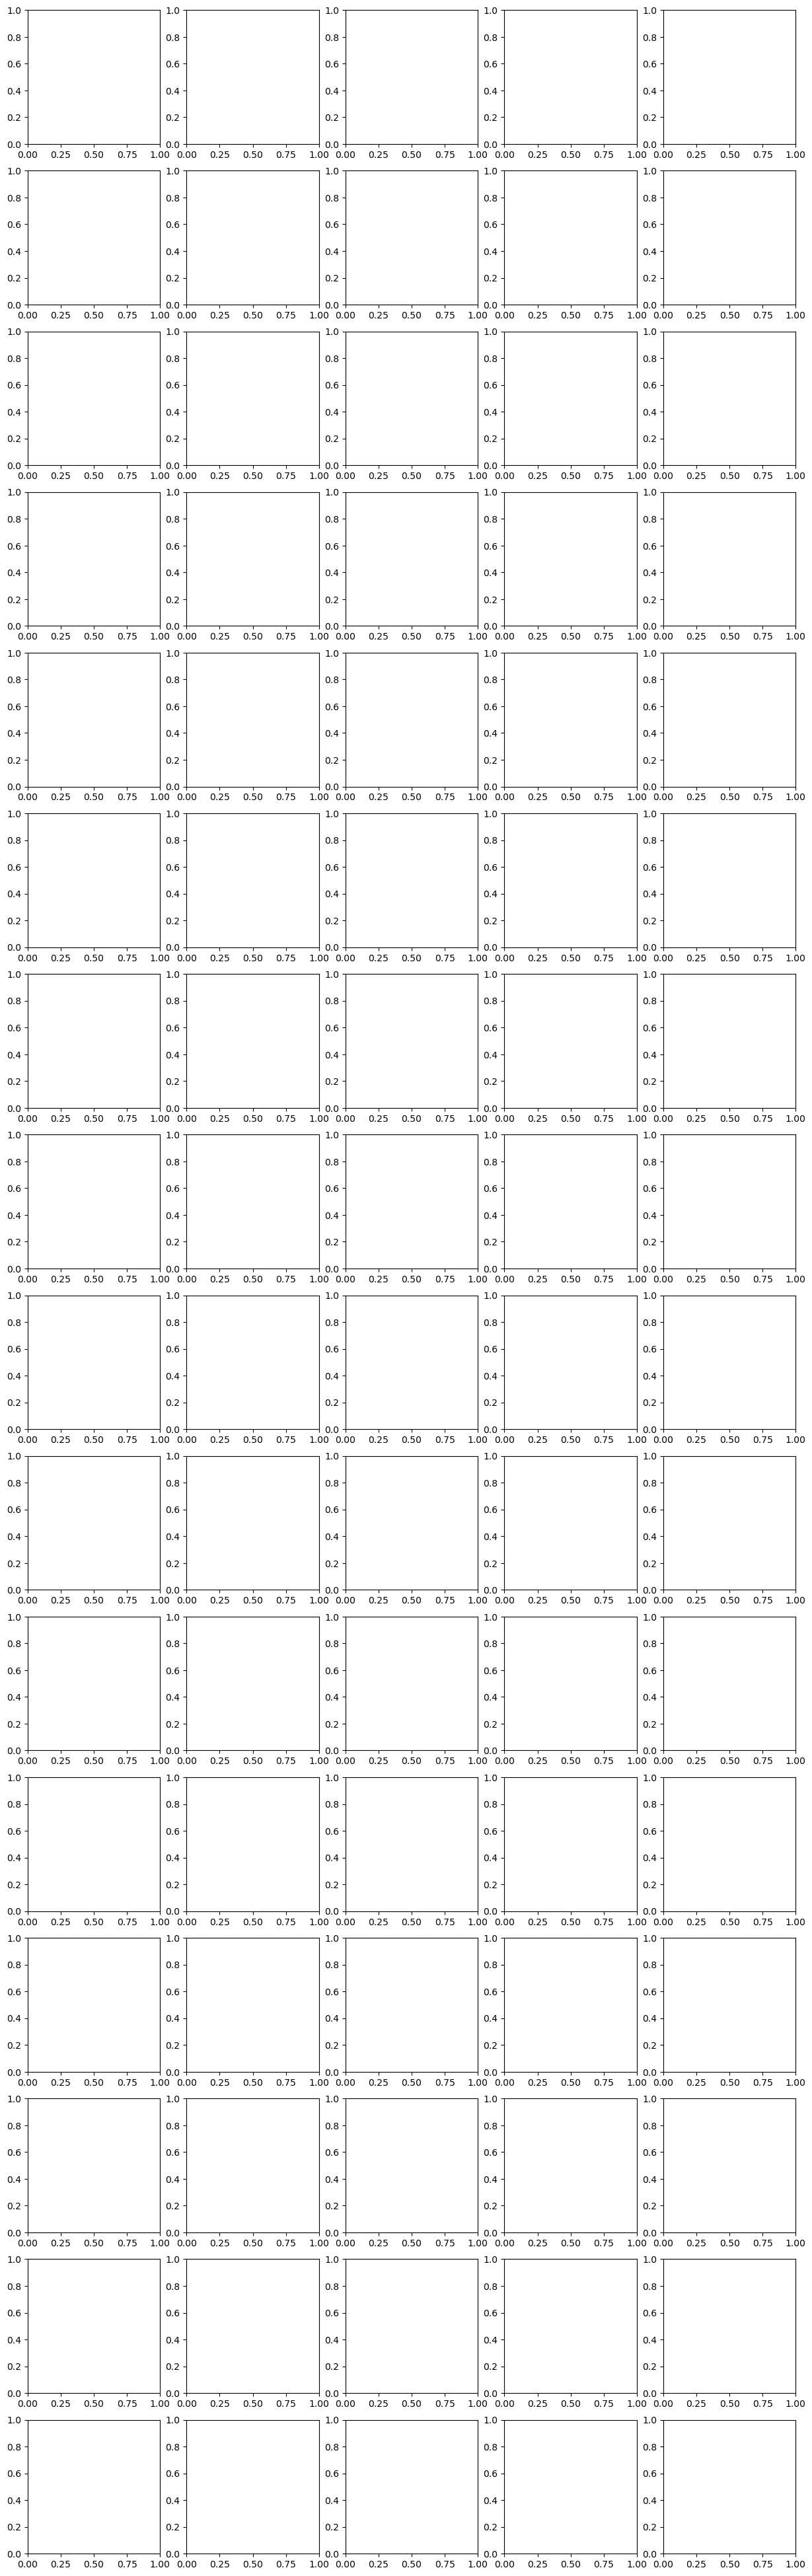

In [36]:
# # Fitting circles using Canny edge detection images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0

f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))
center_dict_ced = {}

for i in range(len(list_imgs)):
     bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
     edges = cv2.Canny(bw_img,100,200)
     contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

     areas = [cv2.contourArea(c) for c in contours]
     sorted_areas = np.sort(areas)
     cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

     (x,y),radius = cv2.minEnclosingCircle(cnt)
     center = (int(x),int(y))
     # print("Center of Circle: ",center)
     radius = int(radius)
     cv2.circle(edges,center,radius,(255,255,255),3)
     center_dict_ced[list_imgs[n+i]] = center


     axarr[i%img_row,i%img_cols].imshow(edges,cmap="gray")
            

     axarr[i%img_row,i%img_cols].axis("off")
     axarr[i%img_row,i%img_cols].set_title("Center of Circle: {}".format(center))

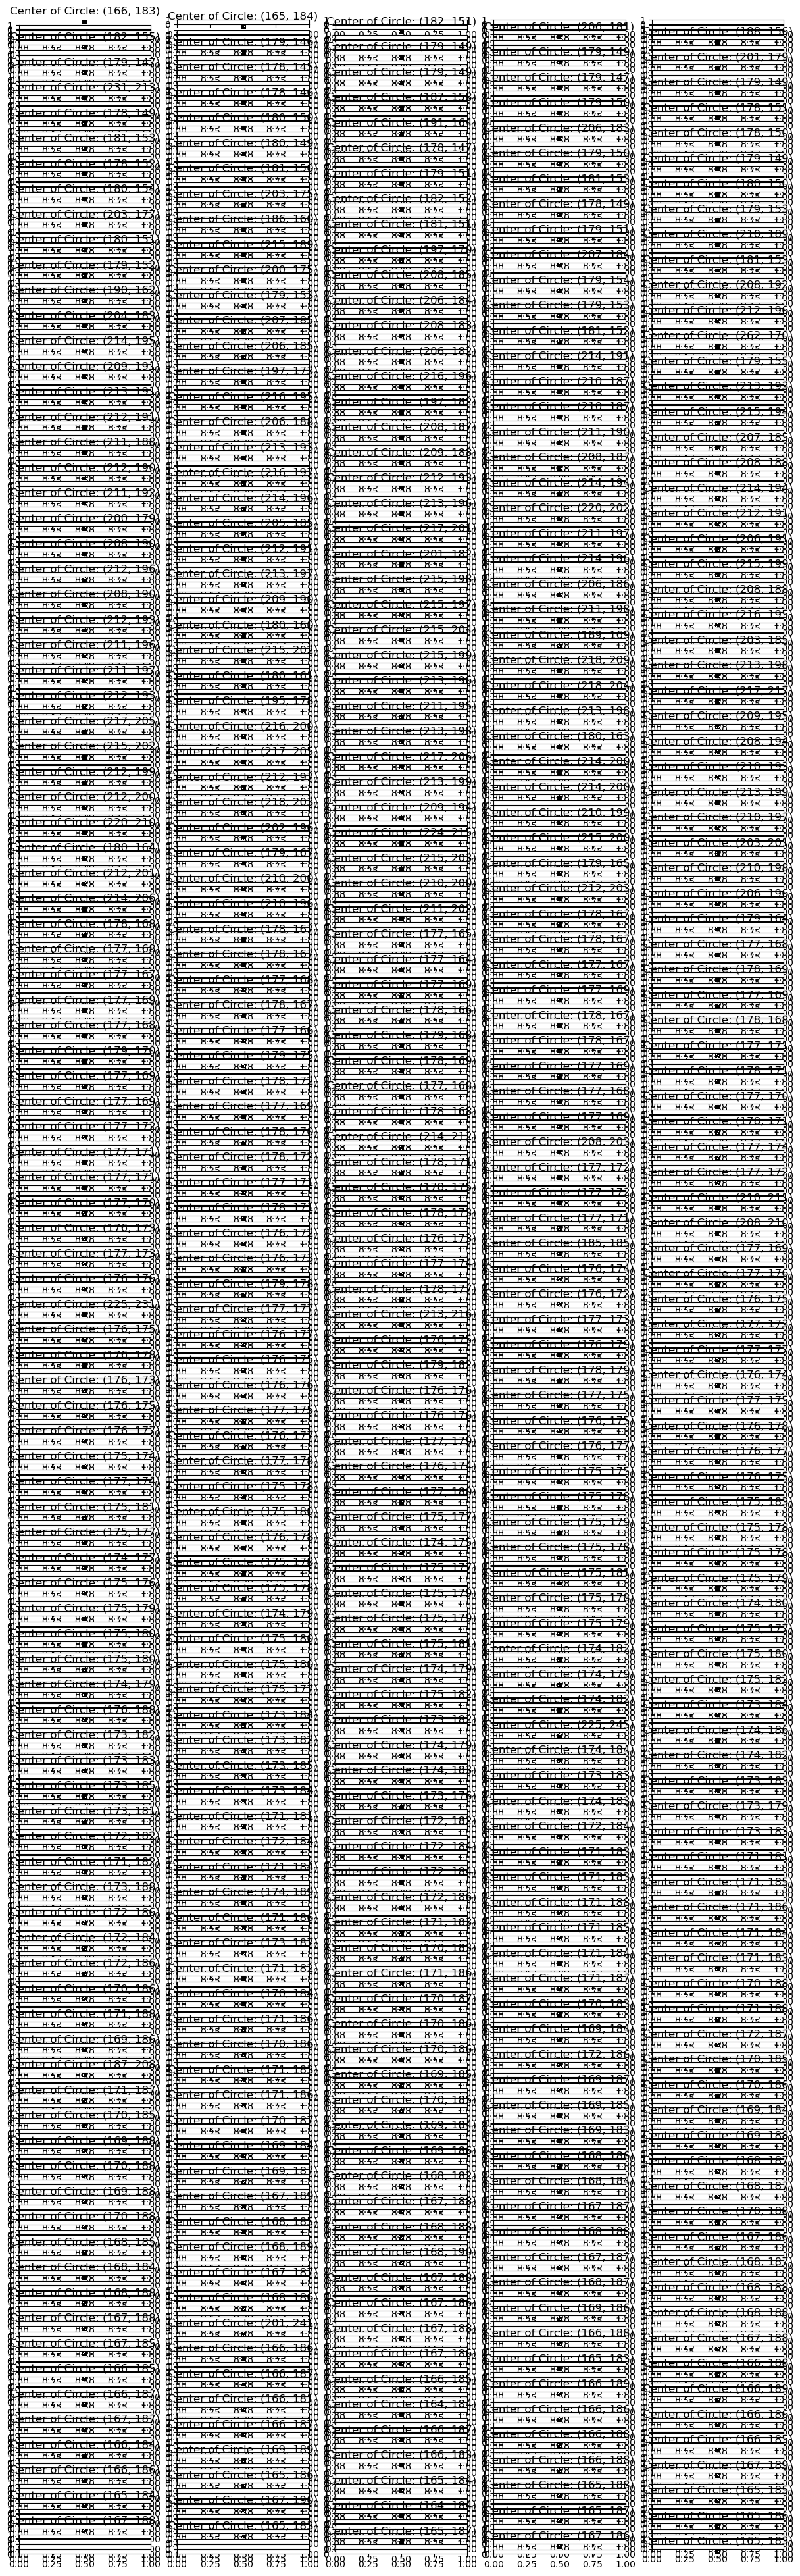

In [14]:
# Fitting circles using Canny edge detection images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0

f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))
center_dict_ced = {}

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    edges = cv2.Canny(bw_img,100,200)
    contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    # print("Center of Circle: ",center)
    radius = int(radius)
    cv2.circle(edges,center,radius,(255,255,255),3)
    center_dict_ced[list_imgs[n+i]] = center

    axarr[i%img_row,i%img_cols].imshow(edges,cmap="gray")
            
    axarr[i%img_row,i%img_cols].axis("off")
    axarr[i%img_row,i%img_cols].set_title("Center of Circle: {}".format(center))


In [ ]:
#print(img_row)

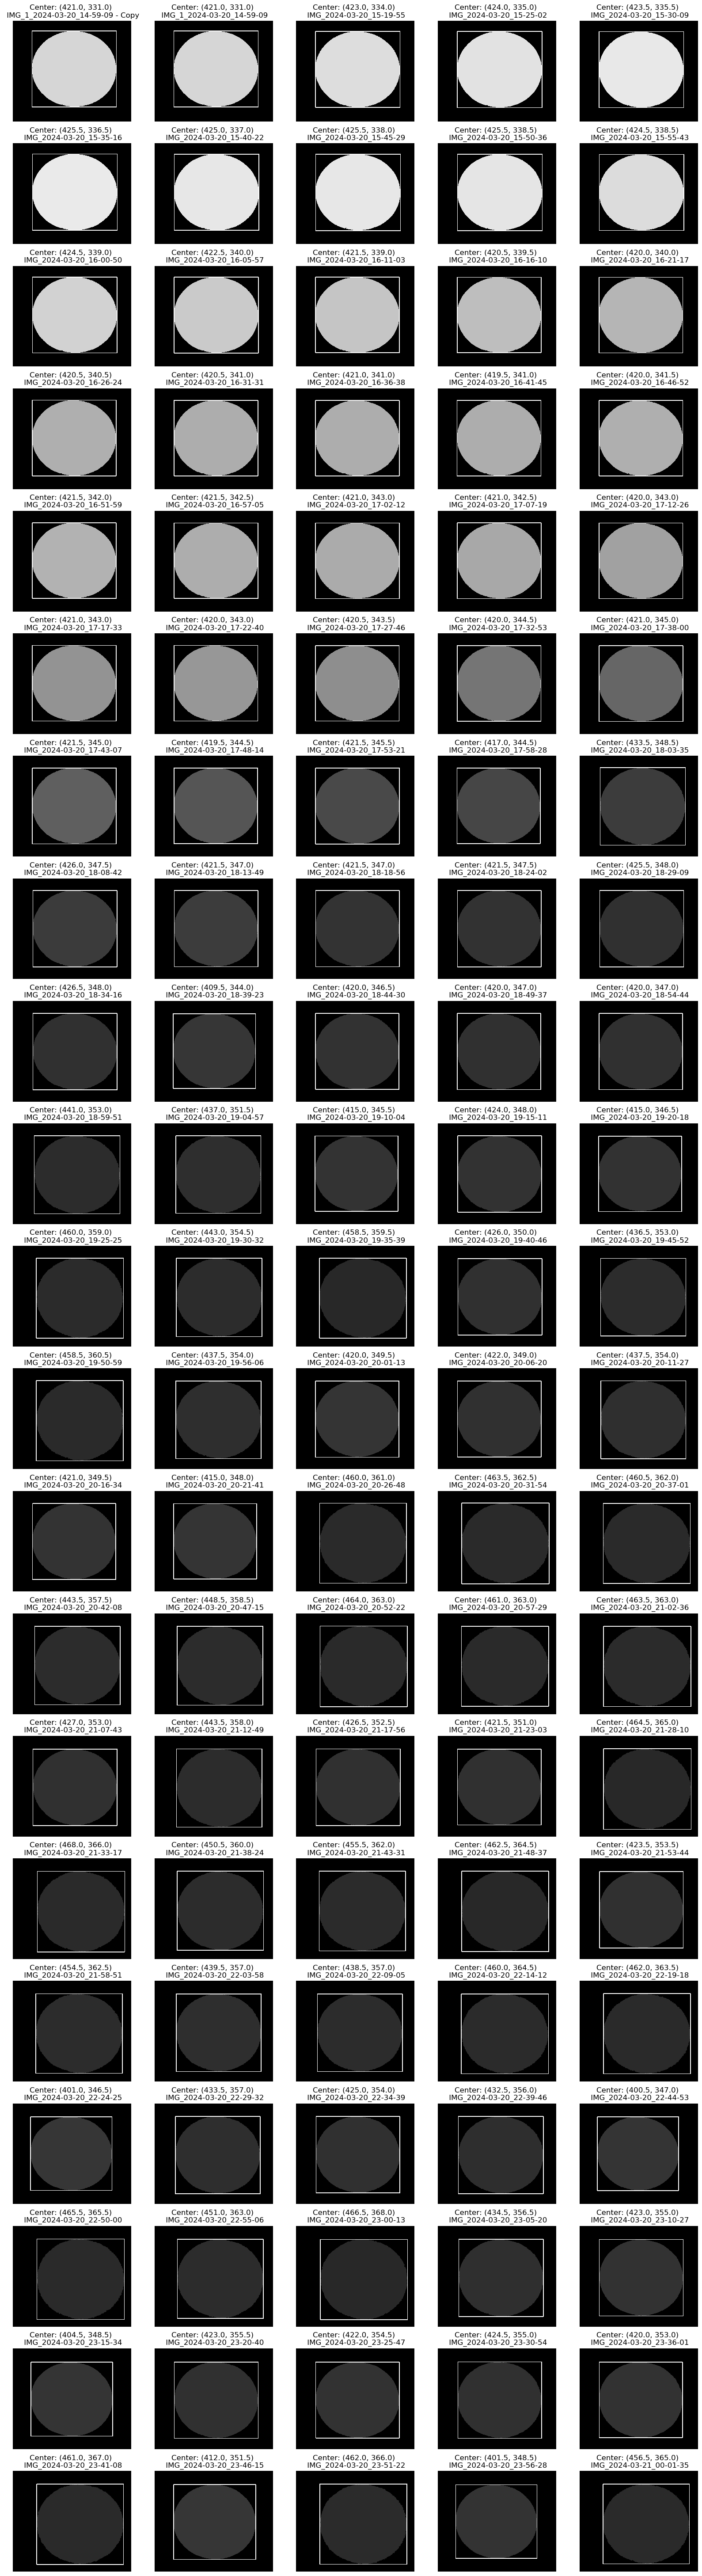

In [14]:
# Bounding box using Black&White images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0
center_bb_dect = {}

f, axarr = plt.subplots(img_row,img_cols,figsize=(20, img_cols*15))
# axarr = np.array(axarr)

for i, ax in zip(range(len(list_imgs)),axarr.flat):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    contours,_ = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)

    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
    r = cv2.boundingRect(cnt)
    center = (r[0]+0.5*r[2], r[1]+0.5*r[3])
    # print("Bounding Box center: ", (r[0]+0.5*r[2], r[1]+0.5*r[3]))
    cv2.rectangle(bw_img,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(255,255,255),3)
    center_bb_dect[list_imgs[n+i]] = center

    # axarr[i%img_row,i%img_cols].imshow(bw_img,cmap="gray")
            

    # axarr[i%img_row,i%img_cols].axis("off")
    # axarr[i%img_row,i%img_cols].set_title("Center: {} \n {}" .format(center,list_imgs[n+i].split(".")[0]))
    # ax = plt.subplot(img_row, img_cols, i + 1)
    ax.imshow(bw_img,cmap="gray")
            

    ax.axis("off")
    ax.set_title("Center: {} \n {}" .format(center,list_imgs[n+i].split(".")[0]))

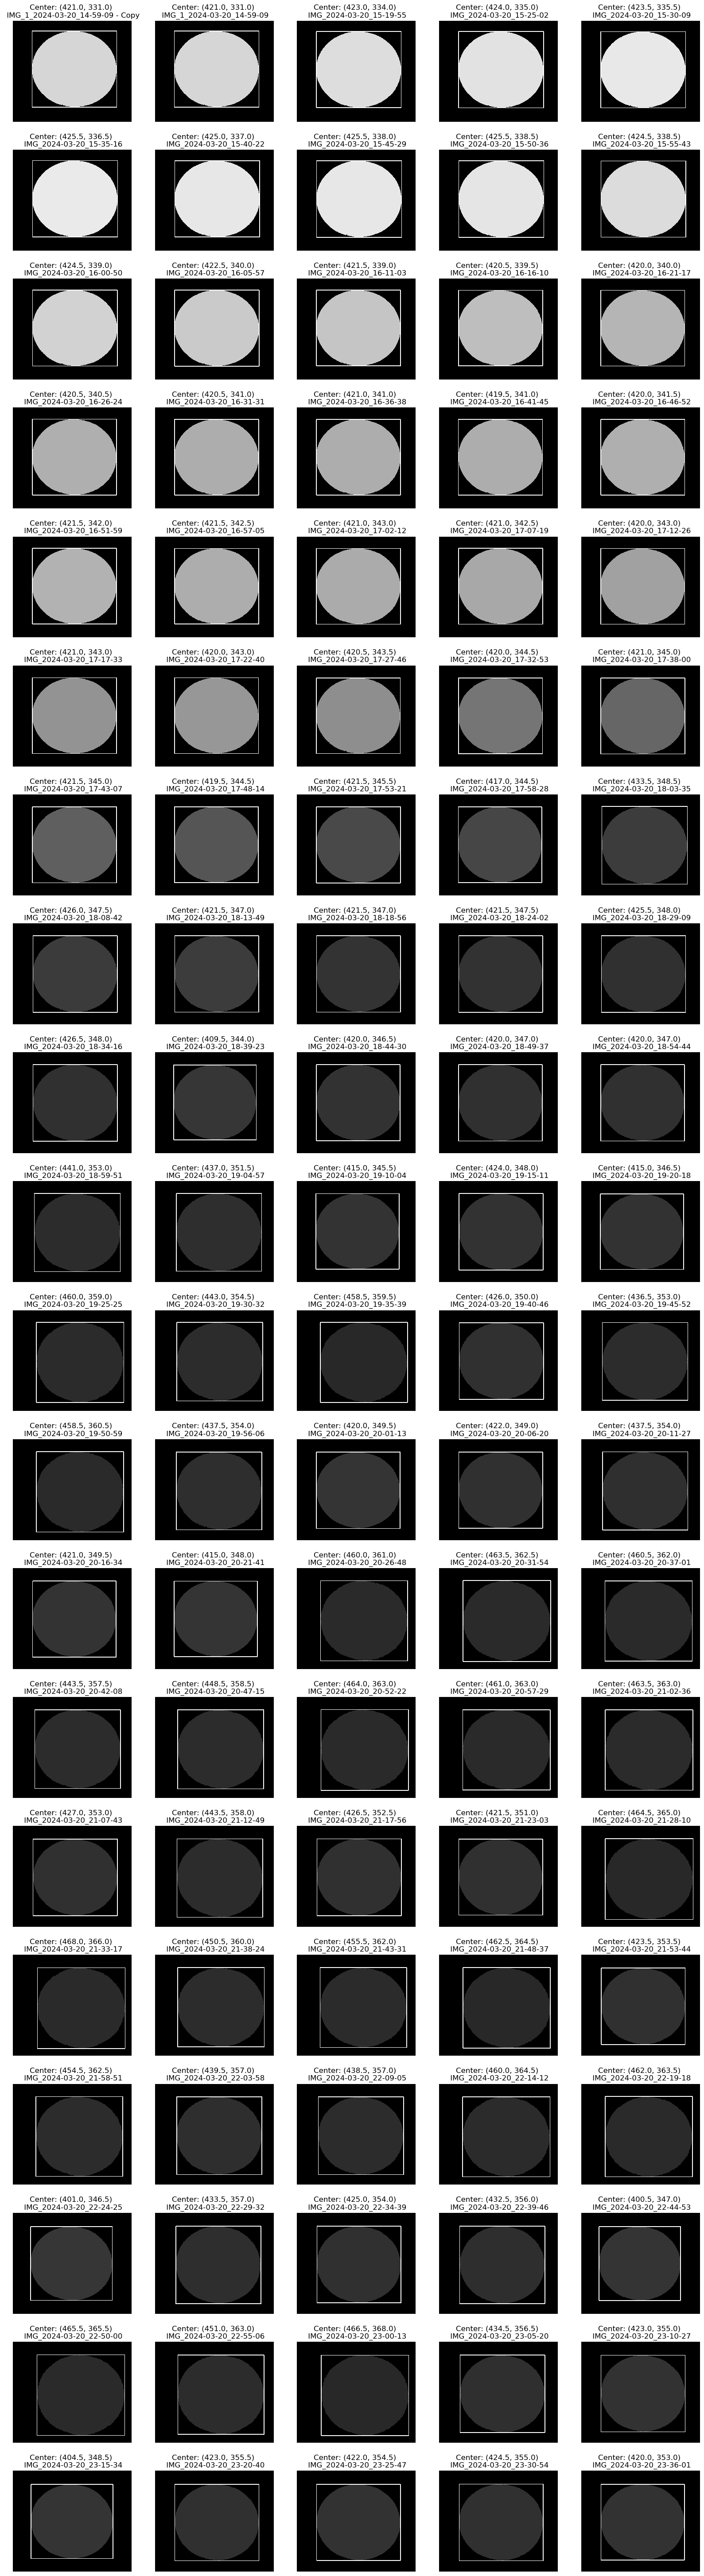

In [15]:
# Bounding box using Black & White images as input
img_row = min(int(len(list_imgs) / 5), 20)  # Displaying up to 100 images in a 5-column grid
img_cols = 5
# Load image 
n = 0
center_bb_dect = {}

# Prepare the plot for the first 100 images
f, axarr = plt.subplots(img_row, img_cols, figsize=(20, img_cols * 15))

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path, list_imgs[n + i]))
    contours, _ = cv2.findContours(bw_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)

    cnt = contours[areas.index(sorted_areas[-1])]  # The biggest contour
    r = cv2.boundingRect(cnt)
    center = (r[0] + 0.5 * r[2], r[1] + 0.5 * r[3])
    cv2.rectangle(bw_img, (r[0], r[1]), (r[0] + r[2], r[1] + r[3]), (255, 255, 255), 3)
    center_bb_dect[list_imgs[n + i]] = center

    if i < 100:
        ax = axarr.flat[i]
        ax.imshow(bw_img, cmap="gray")
        ax.axis("off")
        ax.set_title("Center: {} \n {}".format(center, list_imgs[n + i].split(".")[0]))

# Only show the plot if there are images to display
if len(list_imgs) > 0:
    plt.show()


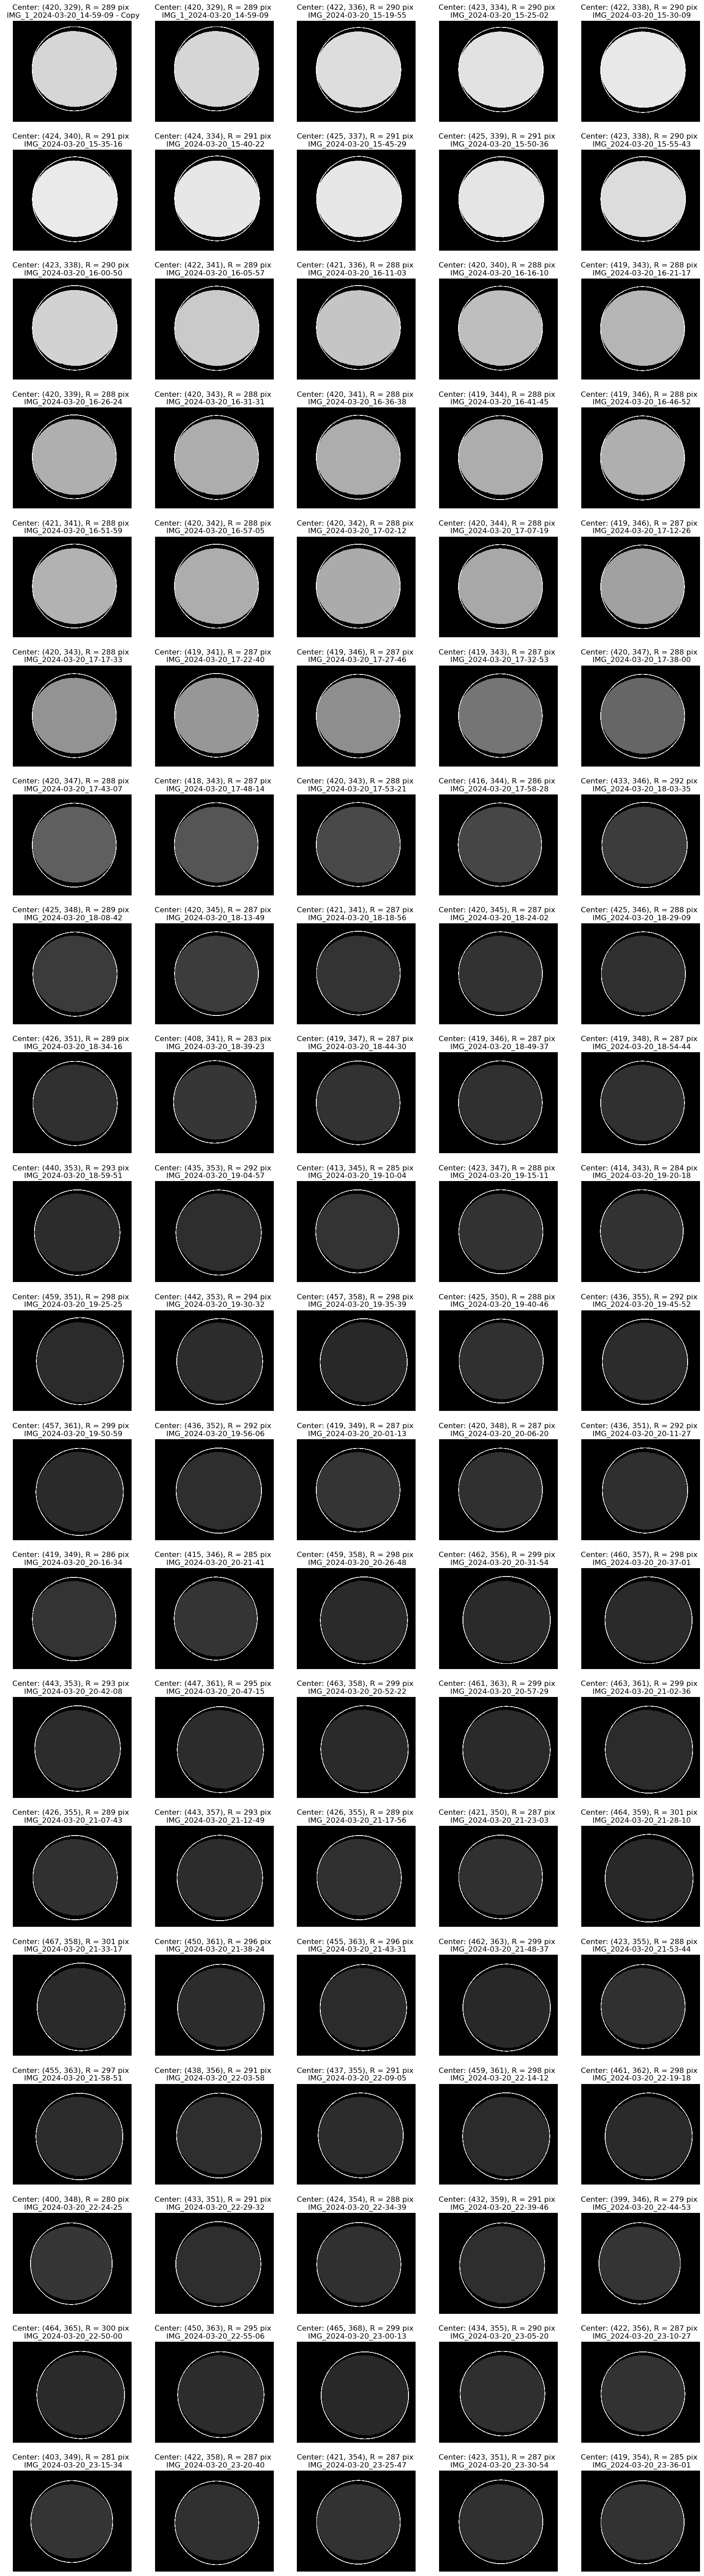

In [16]:
# Fitting circles around contours images as input
img_row = min(int(len(list_imgs) / 5), 20)  # Displaying up to 100 images in a 5-column grid
img_cols = 5
# Load image 
n = 0
center_fix_circle = {}
radius_fix_circle = np.ones((len(list_imgs), 1))

# Prepare the plot for the first 100 images
f, axarr = plt.subplots(img_row, img_cols, figsize=(20, img_cols * 15))

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path, list_imgs[n + i]))
    contours, _ = cv2.findContours(bw_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt = contours[areas.index(sorted_areas[-1])]  # The biggest contour

    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(bw_img, center, radius, (255, 255, 255), 3)
    center_fix_circle[list_imgs[n + i]] = center
    radius_fix_circle[n + i] = radius

    if i < 100:
        ax = axarr.flat[i]
        ax.imshow(bw_img, cmap="gray")
        ax.axis("off")
        ax.set_title("Center: {}, R = {} pix \n {}".format(center, radius, list_imgs[n + i].split(".")[0]))

# Only show the plot if there are images to display
if len(list_imgs) > 0:
    plt.show()


In [ ]:
# save_csv(center_dict_ced,"Canny_edge_center.csv")
save_csv(center_bb_dect,"Bounding_box_center_05_24.csv")
save_csv(center_fix_circle,"Fit_circle_center_05_24.csv")

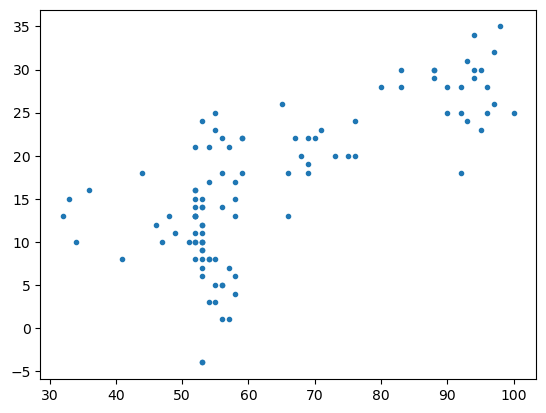

In [20]:
a = list(center_fix_circle.values())
centers_xy = np.array(a, dtype=object)


plt.plot(centers_xy[:,0]-367,centers_xy[:,1]-333,'.')
plt.show()

In [ ]:
# Time series analysis

a = list(center_fix_circle.values())
centers_xy = np.array(a, dtype=object)
x_center = centers_xy[:,0].reshape(-1,1)
y_center = centers_xy[:,1].reshape(-1,1)

dx = np.ediff1d(x_center).reshape(-1,1)
dy = np.ediff1d(y_center).reshape(-1,1)


center_xy_dxdy = np.concatenate((x_center[1:],y_center[1:],dx,dy),axis=1)

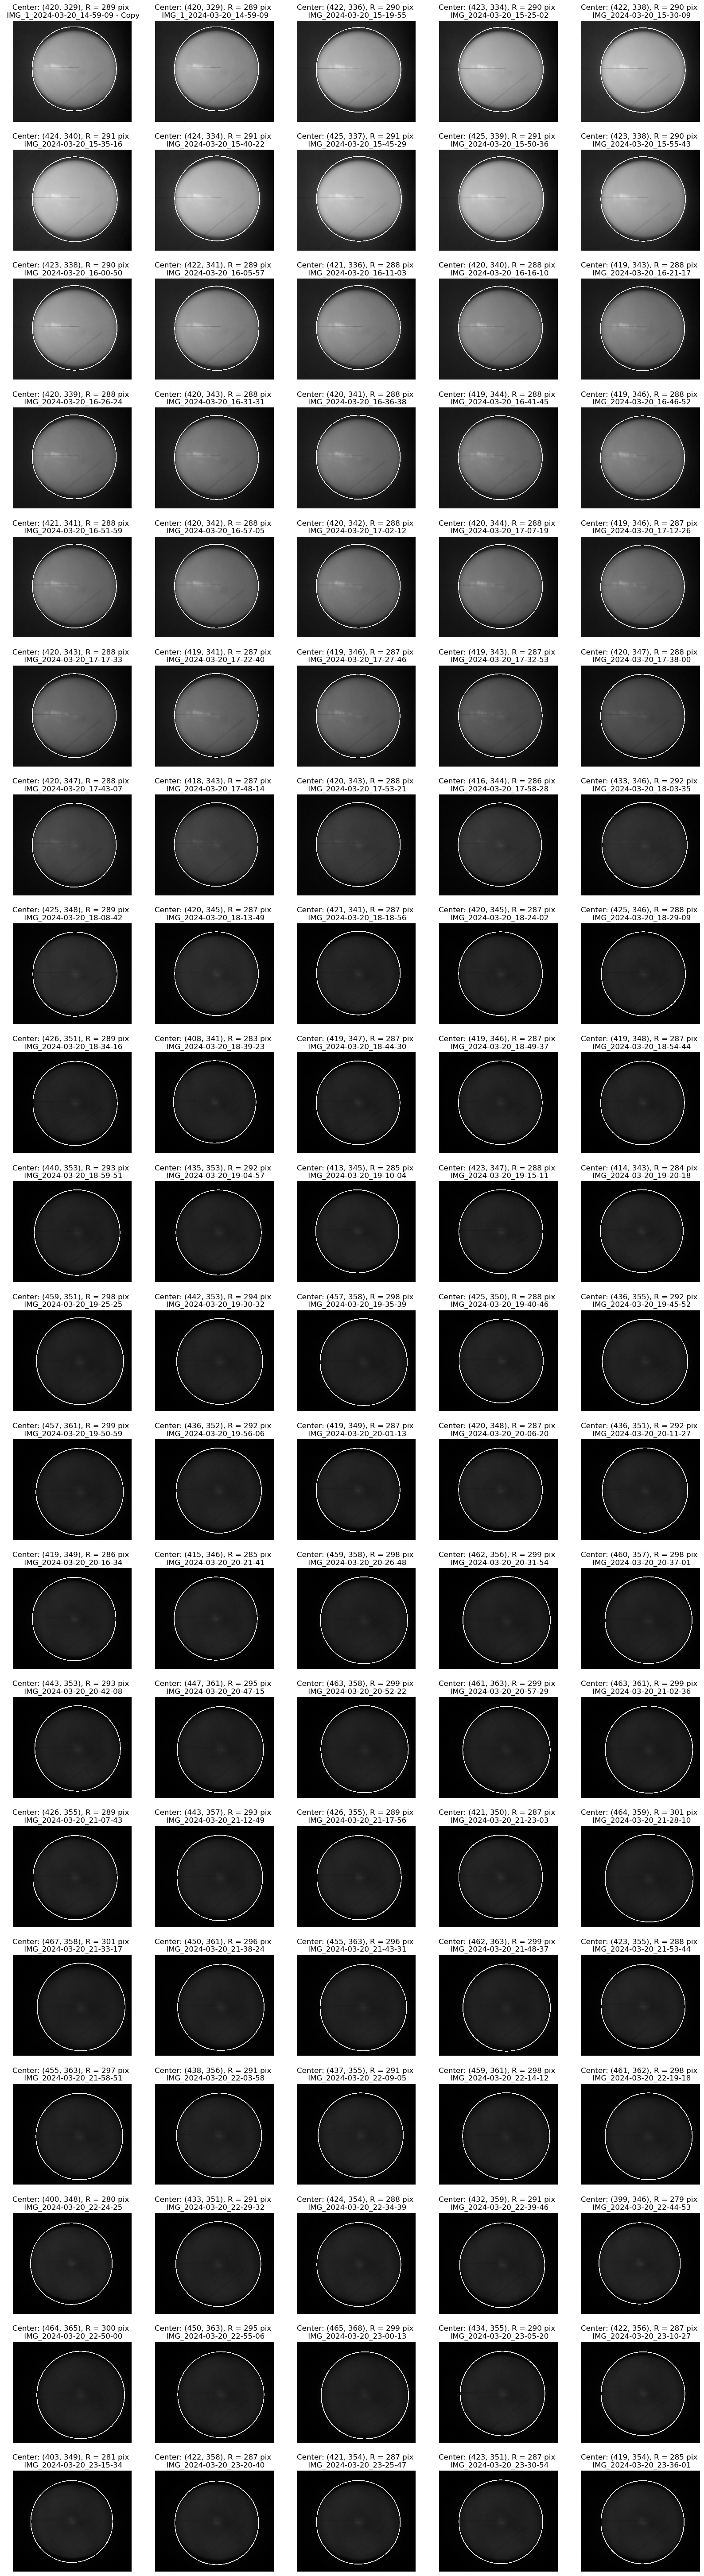

In [17]:

# Fitting circles using Black & White images as input
img_row = min(int(len(list_imgs) / 5) + 1, 20)  # Displaying up to 100 images in a 5-column grid
img_cols = 5
# Load image 
n = 0
center_fix_circle = {}
radius_fix_circle = np.ones((len(list_imgs), 1))

# Prepare the plot for the first 100 images
f, axarr = plt.subplots(img_row, img_cols, figsize=(20, img_cols * 15))

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path, list_imgs[n + i]))
    contours, _ = cv2.findContours(bw_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt = contours[areas.index(sorted_areas[-1])]  # The biggest contour

    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_gray, center, radius, (255, 255, 255), 3)
    center_fix_circle[list_imgs[n + i]] = center
    radius_fix_circle[n + i] = radius

    if i < 100:
        ax = axarr.flat[i]
        ax.imshow(img_gray, cmap="gray")
        ax.axis("off")
        ax.set_title("Center: {}, R = {} pix \n {}".format(center, radius, list_imgs[n + i].split(".")[0]))

# Only show the plot if there are images to display
if len(list_imgs) > 0:
    plt.show()


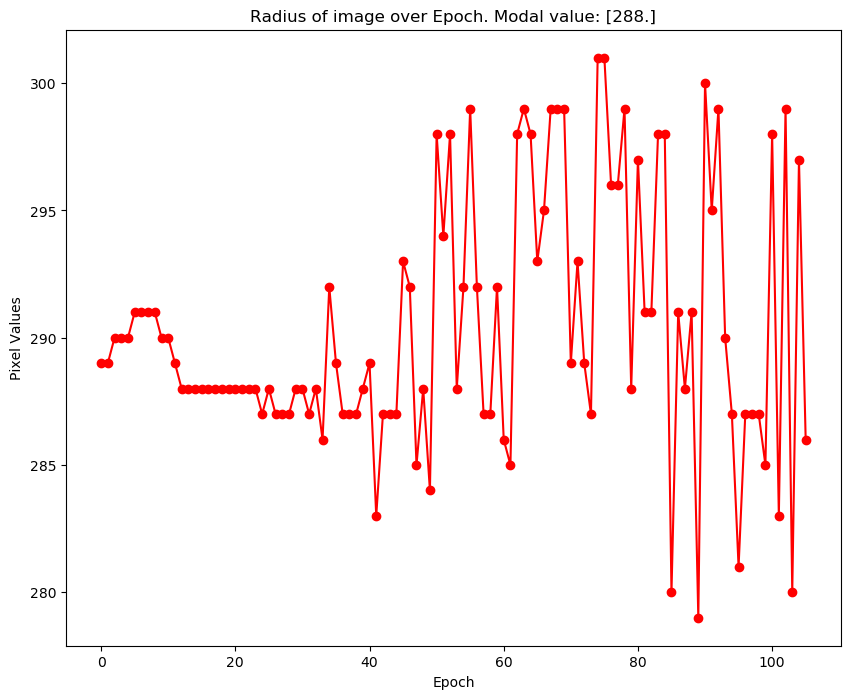

In [18]:
from scipy import stats
mode_val = stats.mode(radius_fix_circle, axis=None)

plt.figure(figsize=(10,8))
plt.plot(radius_fix_circle,'o-r')
plt.title("Radius of image over Epoch. Modal value: {}".format(mode_val[0]))
plt.ylabel("Pixel Values")
plt.xlabel("Epoch")
plt.show()

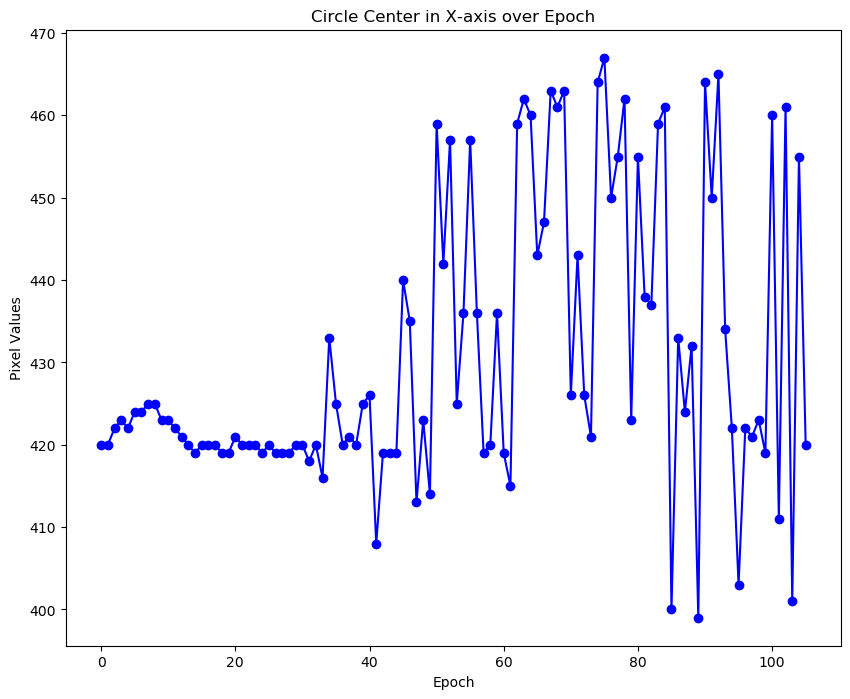

In [21]:
plt.figure(figsize=(10,8))
plt.plot(centers_xy[:,0],'o-b')
plt.title("Circle Center in X-axis over Epoch")
plt.ylabel("Pixel Values")
plt.xlabel("Epoch")
plt.show()

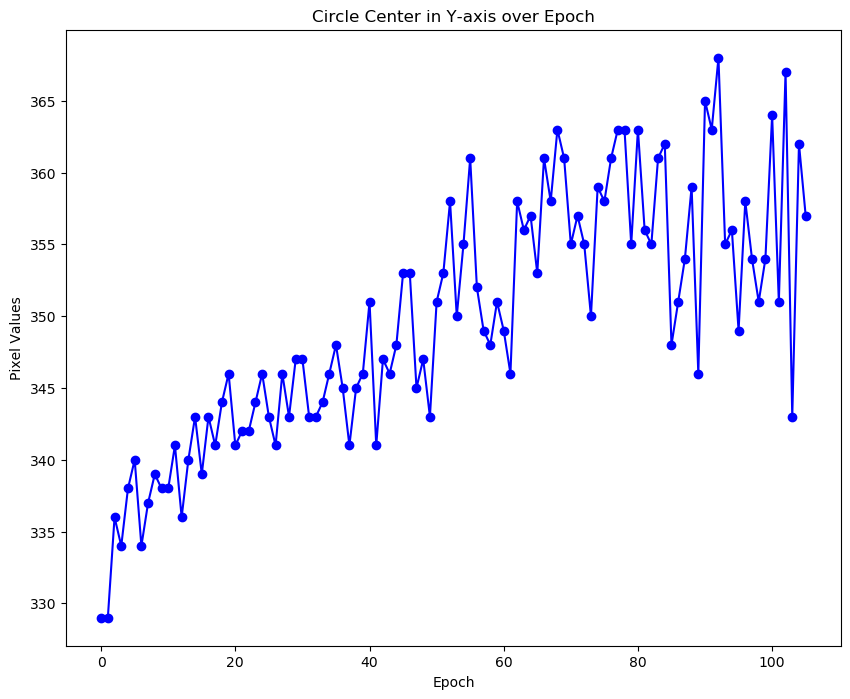

In [22]:
plt.figure(figsize=(10,8))
plt.plot(centers_xy[:,1],'o-b')
plt.title("Circle Center in Y-axis over Epoch")
plt.ylabel("Pixel Values")
plt.xlabel("Epoch")
plt.show()

In [23]:
# the modal here is the ´most recurring radius value in pixel. With the consistency, it is set is set as the base 
# the conversion.
ratio = (99.6799+99.6363)*0.25 / mode_val[0]
ratio




array([0.17301753])

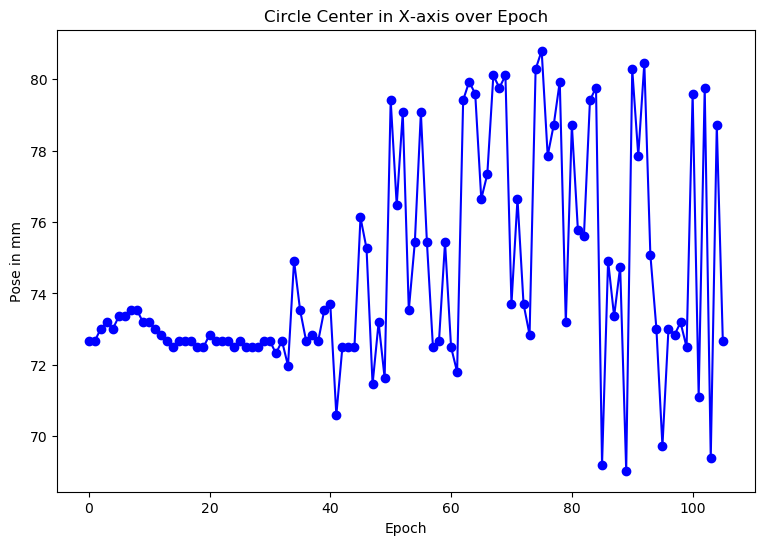

In [24]:
plt.figure(figsize=(9,6))
plt.plot(centers_xy[:,0]*ratio,'o-b')
plt.title("Circle Center in X-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

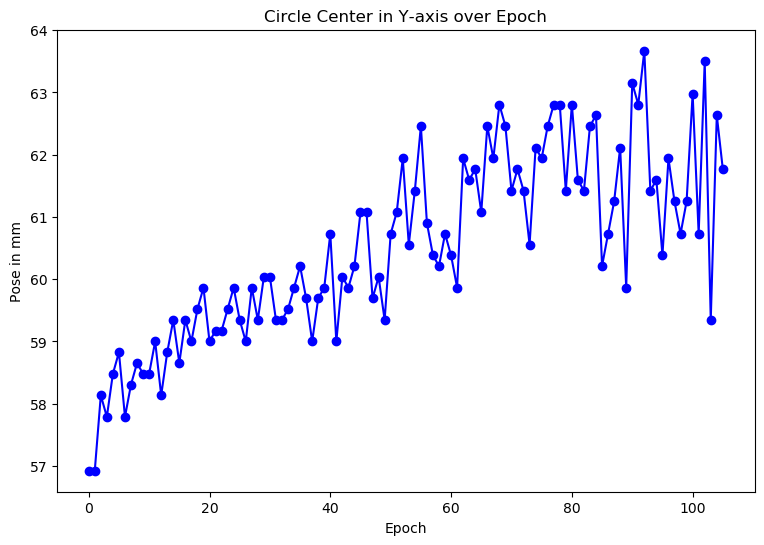

In [25]:
plt.figure(figsize=(9,6))
plt.plot(centers_xy[:,1]*ratio,'o-b')
plt.title("Circle Center in Y-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

In [27]:
x_center = centers_xy[:,0].reshape(-1,1)
y_center = centers_xy[:,1].reshape(-1,1)
dx = np.ediff1d(x_center).reshape(-1,1)
dy = np.ediff1d(y_center).reshape(-1,1)

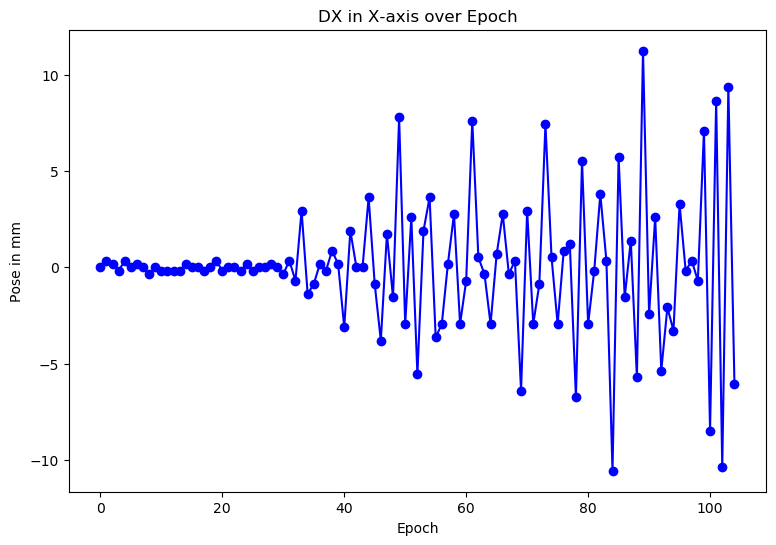

In [28]:
plt.figure(figsize=(9,6))
plt.plot(dx*ratio,'o-b')
plt.title("DX in X-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

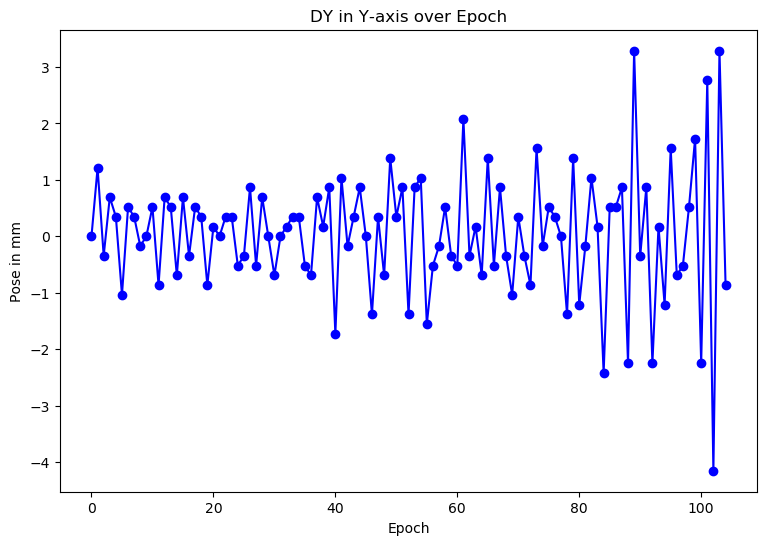

In [29]:
plt.figure(figsize=(9,6))
plt.plot(dy*ratio,'o-b')
plt.title("DY in Y-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

In [ ]:
list_imgs[0][10:29]

'2024-02-05_10-19-23'